In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [5]:
import os
print(os.path.abspath("datasets/datasets_cleaned/Alternative Fuel Vehicles US cleaned.csv"))


C:\Users\Ismalia Gonzalez\Desktop\Proyecto Final\GreenMiles_NYC_Taxis\eda\Electric car\datasets\datasets_cleaned\Alternative Fuel Vehicles US cleaned.csv


In [7]:
pd.set_option('display.max_columns', None)

In [6]:
ruta_archivo = "../datasets/datasets_cleaned/Alternative Fuel Vehicles US cleaned.csv"
alternative_fuel_vehicles = pd.read_csv(ruta_archivo)


In [8]:
alternative_fuel_vehicles.head(3)

Category       Model  Model Year Manufacturer             Fuel  \
0  Sedan/Wagon         NSX        2022        Acura  Hybrid Electric   
1  Sedan/Wagon         A3         2022         Audi  Hybrid Electric   
2  Sedan/Wagon  A3 quattro        2022         Audi  Hybrid Electric   

   All-Electric Range  Alternative Fuel Economy Combined  \
0                 NaN                                NaN   
1                 NaN                                NaN   
2                 NaN                                NaN   

   Conventional Fuel Economy Combined Transmission Type Engine Size  
0                                21.0         Automatic        3.5L  
1                                32.0         Automatic        2.0L  
2                                31.0         Automatic        2.0L

####  Dicccionario:

1. **Category:** Tipo de vehículo.
2. **Model:** Modelo específico del vehículo.
3. **Model Year:** Año del modelo del vehículo.
4. **Manufacturer:** Fabricante del vehículo.
5. **Fuel:** Tipo de combustible utilizado por el vehículo.
6. **All-Electric Range:** Rango completamente eléctrico del vehículo (en millas o km).
7. **Alternative Fuel Economy Combined:** Economía de combustible combinada para vehículos de combustible alternativo.
8. **Conventional Fuel Economy Combined:** Economía de combustible combinada para vehículos convencionales.
9. **Transmission Type:** Tipo de transmisión del vehículo (por ejemplo, automático).
10. **Engine Size:** Tamaño del motor del vehículo.

In [9]:
alternative_fuel_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            867 non-null    object 
 1   Model                               867 non-null    object 
 2   Model Year                          867 non-null    int64  
 3   Manufacturer                        867 non-null    object 
 4   Fuel                                867 non-null    object 
 5   All-Electric Range                  221 non-null    float64
 6   Alternative Fuel Economy Combined   259 non-null    float64
 7   Conventional Fuel Economy Combined  431 non-null    float64
 8   Transmission Type                   867 non-null    object 
 9   Engine Size                         575 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 67.9+ KB


In [10]:
alternative_fuel_vehicles.describe()

Model Year  All-Electric Range  Alternative Fuel Economy Combined  \
count   867.000000          221.000000                         259.000000   
mean   1352.357555          165.502262                          76.451737   
std     951.851340          133.143211                          32.015751   
min       0.000000            8.000000                          11.000000   
25%       0.000000           23.000000                          56.000000   
50%    2021.000000          202.000000                          76.000000   
75%    2022.000000          260.000000                         101.000000   
max    2022.000000          520.000000                         142.000000   

       Conventional Fuel Economy Combined  
count                          431.000000  
mean                            27.412993  
std                              9.899082  
min                             15.000000  
25%                             21.000000  
50%                             24.000000  
75%                             30.000000  
max                             59.000000

**Estadísticas Descriptivas:**

- El conjunto de datos contiene información sobre 594 vehículos.  
- La mayoría de los vehículos son del año 2021 y 2022.  
- La autonomía eléctrica varía ampliamente, con un rango mínimo de 8 km y un máximo de 520 km.  
- La autonomía total para vehículos PHEV tiene un rango de 290 km a 640 km.  
- La economía de combustible alternativa y convencional muestra variabilidades significativas, con valores medios y medianos proporcionados.  
- El número de cilindros del motor varía, siendo la media de aproximadamente 5.45. 

**Según categoría:**

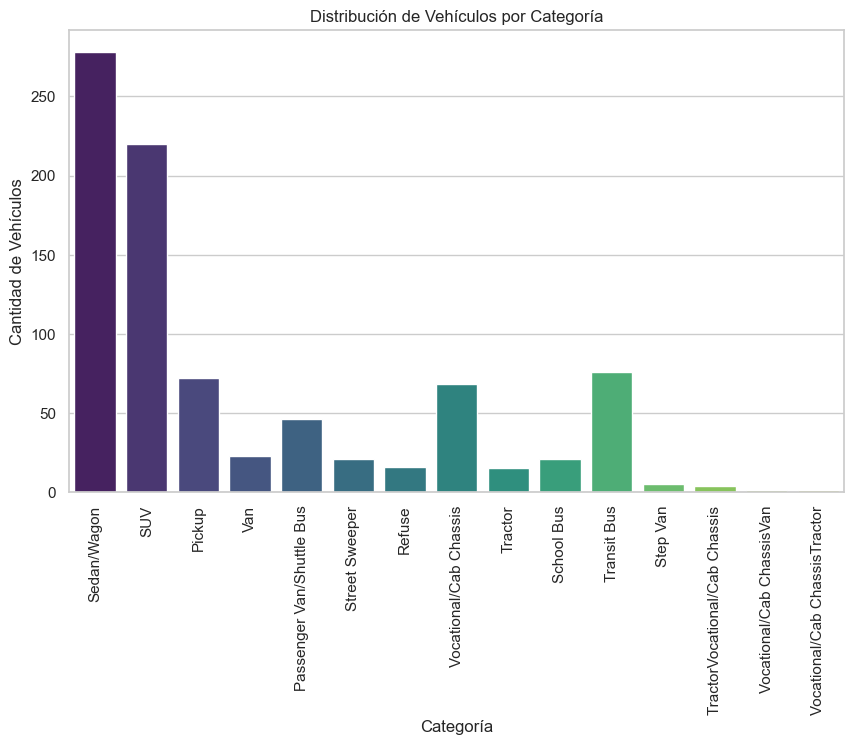

In [12]:
# Establecer el estilo y tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras con nombres en el eje X rotados
sns.countplot(data=alternative_fuel_vehicles, x='Category', palette='viridis')
plt.xticks(rotation=90)  # Rotar nombres en el eje X

# Agregar título y etiquetas
plt.title("Distribución de Vehículos por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de Vehículos")

# Mostrar el gráfico
plt.show()


Las categorías más comunes en el conjunto de datos son 'Sedan/Wagon' y 'SUV', con 283 y 222 vehículos respectivamente, lo que sugiere una predominancia de estos tipos de vehículos. Además, la presencia de categorías especializadas como 'Street Sweeper', 'School Bus', 'Refuse', y 'Tractor' indica una diversidad de vehículos considerados. Sin embargo, se observa una baja representación en ciertas categorías específicas como 'Vocational/Cab ChassisVan' y 'Vocational/Cab ChassisTractor', con solo un vehículo en cada categoría, posiblemente indicando que estos tipos son menos comunes o menos abordados en este conjunto de datos en particular.

**Según Model Year: Año del modelo del vehículo.:**

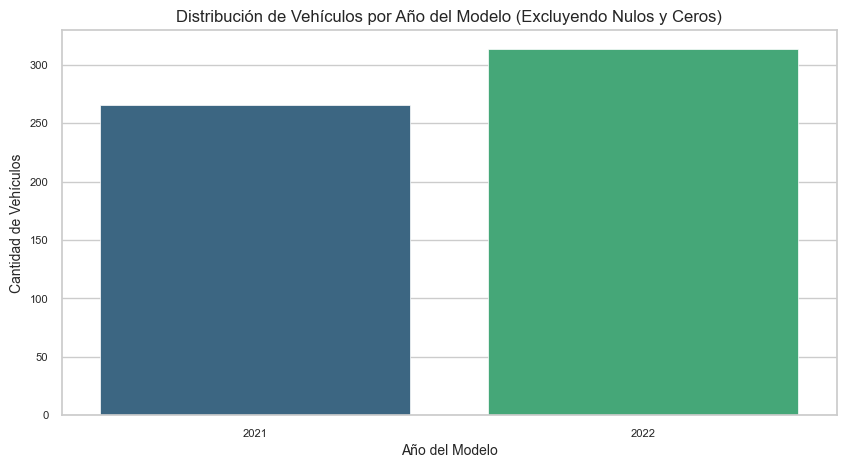

In [13]:
# Filtrar los datos para excluir los valores nulos o ceros en la columna 'Model Year'
filtered_data = alternative_fuel_vehicles[alternative_fuel_vehicles['Model Year'].notnull() & (alternative_fuel_vehicles['Model Year'] != 0)]

# Establecer el estilo y tamaño del gráfico con un aspecto más pequeño
sns.set(style="whitegrid", rc={"axes.titlesize": 12, "axes.labelsize": 10, "xtick.labelsize": 8, "ytick.labelsize": 8})
plt.figure(figsize=(10, 5))

# Crear el gráfico de barras según Model Year con barras más delgadas
ax = sns.countplot(data=filtered_data, x='Model Year', palette='viridis', linewidth=0.5)

# Agregar título y etiquetas
plt.title("Distribución de Vehículos por Año del Modelo (Excluyendo Nulos y Ceros)")
plt.xlabel("Año del Modelo")
plt.ylabel("Cantidad de Vehículos")

# Mostrar el gráfico
plt.show()

In [14]:
# Obtener la frecuencia de cada valor único, incluyendo nulos
model_year_counts = alternative_fuel_vehicles['Model Year'].value_counts(dropna=False)

# Mostrar los resultados
print(model_year_counts)


2022    314
0       287
2021    266
Name: Model Year, dtype: int64


La columna 'Model Year' muestra la distribución de vehículos en el conjunto de datos según su año de modelo. En el gráfico de barras, se observa que la mayoría de los vehículos están etiquetados como del año 2022, seguidos por aquellos con el año de modelo no especificado (NaN) y los del año 2021. La presencia significativa de valores nulos (NaN) en esta columna sugiere la falta de información específica sobre el año de modelo en una proporción considerable de registros, lo que podría afectar la interpretación precisa de esta característica en el conjunto de datos.

**Según Manufacturer: Fabricante del vehículo.**

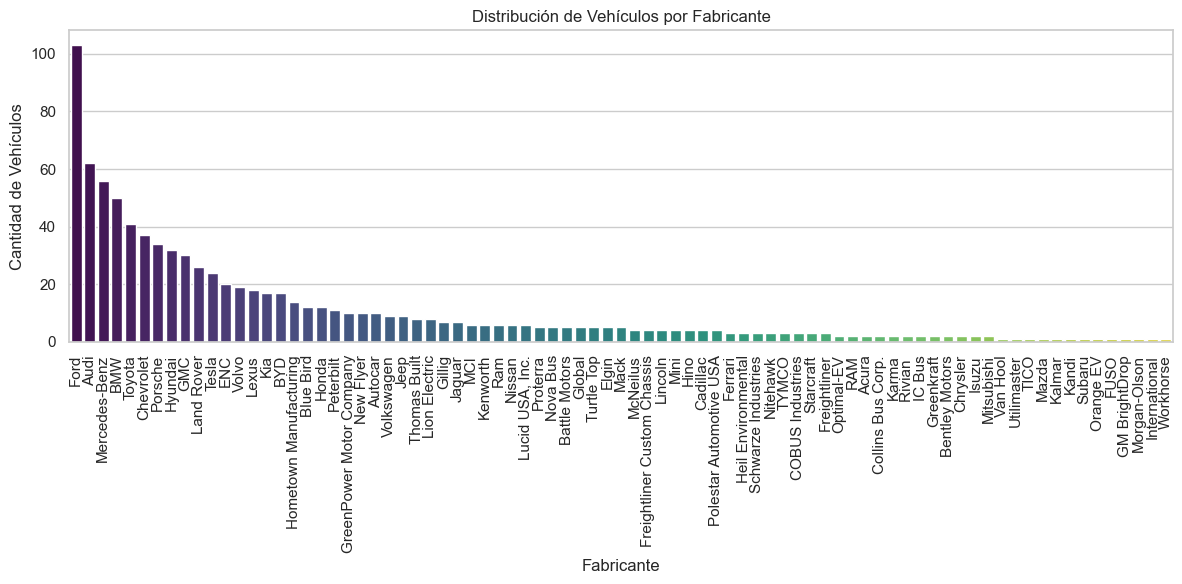

In [15]:
# Calcular la cantidad de vehículos por fabricante y ordenar de mayor a menor
manufacturer_counts = alternative_fuel_vehicles['Manufacturer'].value_counts()
manufacturer_order = manufacturer_counts.index

# Establecer el estilo y tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras con nombres en el eje X rotados y ordenados
sns.countplot(data=alternative_fuel_vehicles, x='Manufacturer', palette='viridis', order=manufacturer_order)
plt.xticks(rotation=90)  # Rotar nombres en el eje X

# Agregar título y etiquetas
plt.title("Distribución de Vehículos por Fabricante")
plt.xlabel("Fabricante")
plt.ylabel("Cantidad de Vehículos")

# Ajustar el diseño para evitar la superposición de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El análisis exhaustivo de la distribución de vehículos por fabricante revela patrones y tendencias significativas en el conjunto de datos de vehículos de combustible alternativo. En primer lugar, destaca la dominancia de Ford, que lidera con la mayor cantidad de vehículos, sugiriendo un enfoque estratégico en la producción de vehículos respetuosos con el medio ambiente. Esta presencia destacada podría indicar la importancia estratégica de Ford en el mercado de vehículos de combustible alternativo.

Asimismo, se observa una amplia variedad de fabricantes, desde marcas de lujo como Audi, Mercedes-Benz y BMW, hasta fabricantes especializados y de carga. Este espectro diverso refleja la participación de diferentes actores en el mercado de vehículos ecológicos y destaca la importancia de la variedad de opciones disponibles para los consumidores.

La presencia de fabricantes de lujo en el conjunto de datos, como Audi, Mercedes-Benz y BMW, subraya la relevancia del segmento de vehículos de combustible alternativo en el sector premium del mercado automotriz. Además, la inclusión de Tesla, conocido por su enfoque en vehículos eléctricos, indica su posición clave en el mercado de vehículos eléctricos y de combustible alternativo.

El análisis también aborda la diversidad del mercado de vehículos comerciales, con la presencia de fabricantes como GMC, Peterbilt, Autocar y Freightliner. Esto sugiere que el mercado de vehículos de combustible alternativo no se limita solo a automóviles de pasajeros, sino que abarca una amplia gama de vehículos, incluyendo camiones y autobuses especializados.

Además, se observa la representación de fabricantes menos comunes con menor presencia en el conjunto de datos, lo que puede indicar la inclusión de fabricantes emergentes y especializados en el mercado de vehículos sostenibles.

En conclusión, la distribución detallada de vehículos por fabricante proporciona una visión integral del panorama actual de la industria de vehículos de combustible alternativo. Este análisis ofrece una comprensión profunda de la participación de cada fabricante en el mercado y sugiere oportunidades para investigaciones adicionales sobre estrategias específicas, tecnologías y posicionamiento en el mercado de cada actor.

**Según Fuel: Tipo de combustible utilizado por el vehículo:**

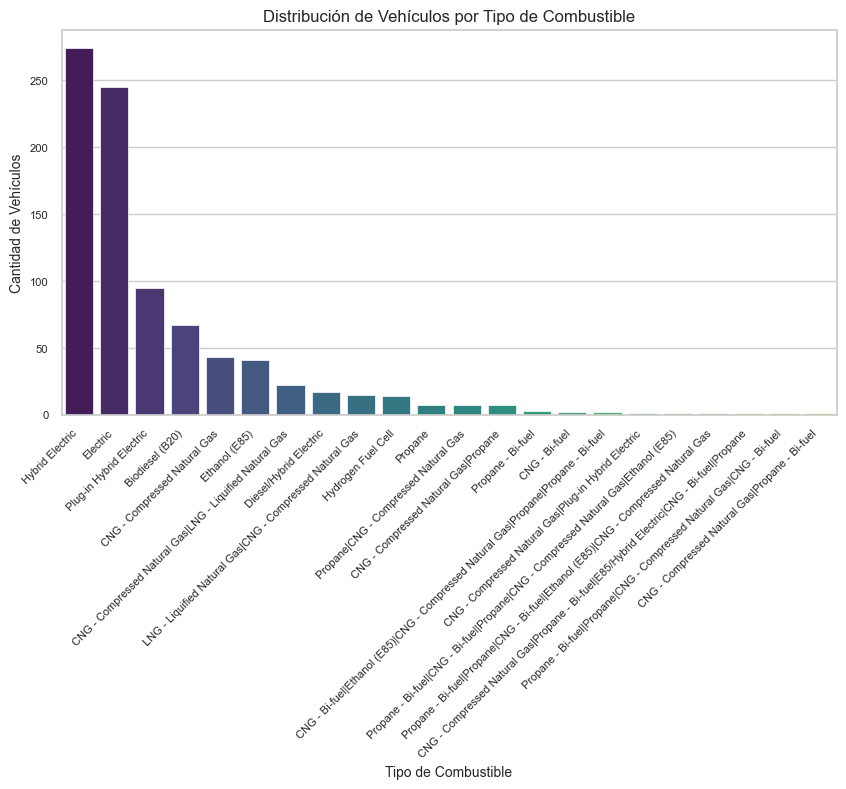

In [16]:
# Establecer el estilo y tamaño del gráfico
sns.set(style="whitegrid", rc={"axes.titlesize": 12, "axes.labelsize": 10, "xtick.labelsize": 8, "ytick.labelsize": 8})
plt.figure(figsize=(10, 5))

# Crear el gráfico de barras según el tipo de combustible
sns.countplot(data=alternative_fuel_vehicles, x='Fuel', palette='viridis', order=alternative_fuel_vehicles['Fuel'].value_counts().index, linewidth=0.5)

# Agregar título y etiquetas
plt.title("Distribución de Vehículos por Tipo de Combustible")
plt.xlabel("Tipo de Combustible")
plt.ylabel("Cantidad de Vehículos")

# Rotar etiquetas en el eje X para mejorar la legibilidad
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.show()

En el gráfico de barras que muestra la distribución de vehículos por tipo de combustible, se pueden extraer varias observaciones clave. La categoría más predominante es "Hybrid Electric" con 284 vehículos, seguida de cerca por "Electric" con 246 vehículos. Estos dos tipos de combustibles alternativos son claramente los más representados en el conjunto de datos.

Además, se observa una diversidad de opciones de combustible, lo que sugiere una variedad en las tecnologías utilizadas en los vehículos alternativos. Las opciones menos comunes incluyen "CNG - Bi-fuel|Ethanol (E85)|CNG - Compressed Natural Gas|Propane|Propane - Bi-fuel" y "CNG - Compressed Natural Gas|Propane - Bi-fuel|E85/Hybrid Electric|CNG - Bi-fuel|Propane," cada una representada por un único vehículo en el conjunto de datos.

En general, el gráfico refleja la variedad de tecnologías de combustibles alternativos adoptadas en la industria automotriz, destacando el interés y la inversión en soluciones más sostenibles y respetuosas con el medio ambiente. Es importante tener en cuenta que la categoría "Electric" incluye vehículos completamente eléctricos, mientras que "Hybrid Electric" se refiere a vehículos que combinan un motor de combustión interna con tecnología eléctrica.

**Segun Transmission Type: Tipo de transmisión del vehículo:**

In [17]:
alternative_fuel_vehicles['Transmission Type'].unique()

array(['Automatic', 'Manual', 'Automatic|Manual'], dtype=object)

se reemplazará todas las ocurrencias de "auto" con "automatic" en la columna 'Transmission Type'. 2.si un valor es nulo (pd.isnull(x)) y, en caso afirmativo, lo reemplaza con la cadena 'Manual', de lo contrario, deja el valor sin cambios.

In [18]:
alternative_fuel_vehicles['Transmission Type'] = alternative_fuel_vehicles['Transmission Type'].apply(lambda x: 'Manual' if pd.isnull(x) else x)
alternative_fuel_vehicles['Transmission Type'] = alternative_fuel_vehicles['Transmission Type'].replace({'Auto': 'Automatic'})



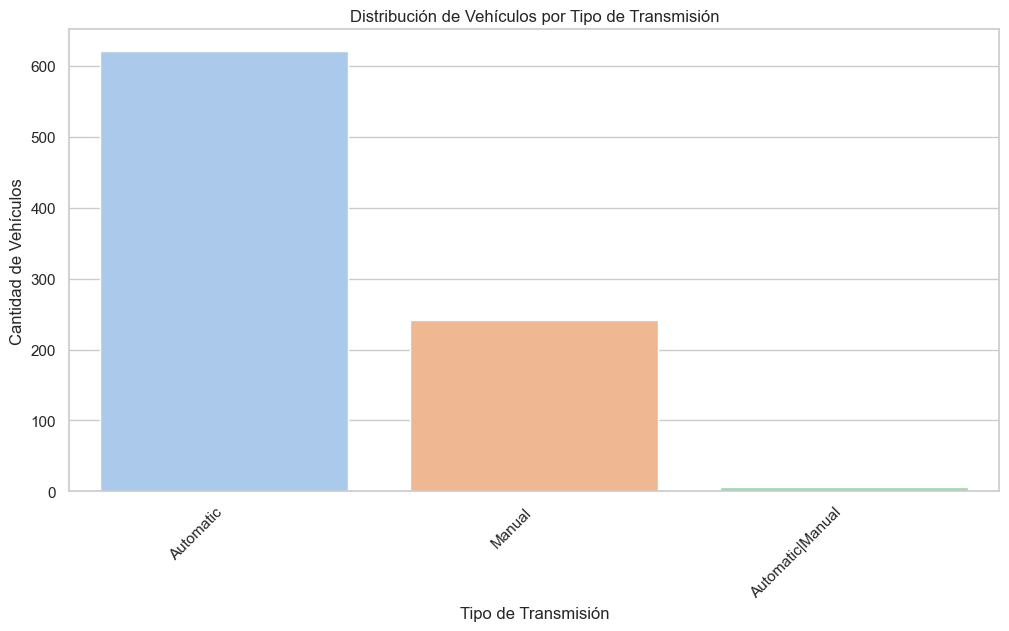

In [19]:
# Establecer el estilo y tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras según Transmission Type
sns.countplot(data=alternative_fuel_vehicles, x='Transmission Type', palette='pastel')

# Rotar los nombres en el eje X para mayor claridad
plt.xticks(rotation=45, ha="right")

# Agregar título y etiquetas
plt.title("Distribución de Vehículos por Tipo de Transmisión")
plt.xlabel("Tipo de Transmisión")
plt.ylabel("Cantidad de Vehículos")

# Mostrar el gráfico
plt.show()

Observamos que la mayoría de los vehículos en el conjunto de datos tienen transmisión automática, con un total de 634. Por otro lado, hay 242 vehículos con transmisión manual. Además, se identifican algunos casos (6 en total) donde los vehículos tienen la capacidad de tener tanto transmisión automática como manual, ya que aparecen etiquetados tanto como "Automatic|Manual" como "Manual|Automatic".

Esta información sugiere que la transmisión automática es la opción predominante en los vehículos representados en el conjunto de datos, pero también hay una proporción significativa de vehículos con transmisión manual. Los casos de "Automatic|Manual" y "Manual|Automatic" pueden indicar la presencia de sistemas de transmisión híbridos o aquellos que permiten al conductor elegir entre modos automático y manual. Estos casos representan una pequeña fracción del conjunto de datos, lo que sugiere que la mayoría de los vehículos se adhieren a una configuración única de transmisión.

**All-Electric Range: Rango completamente eléctrico del vehículo (en millas o km)**

La distribución del rango total eléctrico de vehículos, centrándose exclusivamente en los 10 tipos de combustible más frecuentes en el conjunto de datos. Este análisis proporciona una visión detallada de cómo varía el rango eléctrico en función de los diferentes tipos de combustible predominantes en la industria automotriz actual. La selección de estos tipos de combustible se basa en su frecuencia de aparición, destacando así las tendencias más significativas dentro de la muestra de vehículos alternativos considerados.

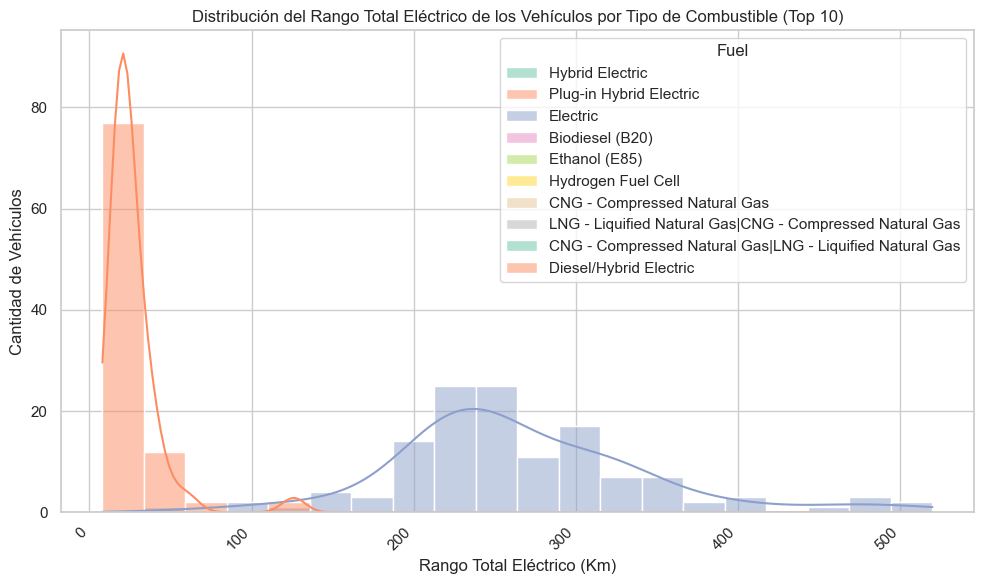

In [20]:
# Seleccionar los 10 primeros tipos de combustible
top_fuels = alternative_fuel_vehicles['Fuel'].value_counts().head(10).index
filtered_data = alternative_fuel_vehicles[alternative_fuel_vehicles['Fuel'].isin(top_fuels)]

# Establecer el estilo y tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crear el histograma con el rango total eléctrico y color por tipo de combustible
sns.histplot(x='All-Electric Range', data=filtered_data, hue='Fuel', bins=20, kde=True, palette='Set2')

# Agregar título y etiquetas
plt.title("Distribución del Rango Total Eléctrico de los Vehículos por Tipo de Combustible (Top 10)")
plt.xlabel("Rango Total Eléctrico (Km)")
plt.ylabel("Cantidad de Vehículos")

plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


La distribución del rendimiento en kilómetros del sustento eléctrico revela dos tendencias predominantes: los vehículos eléctricos puros (Electric) y los híbridos enchufables (Plug-in Hybrid Electric). Los vehículos eléctricos puros muestran un rendimiento coherente con su enfoque totalmente eléctrico, ofreciendo una distancia considerablemente mayor en comparación con los híbridos enchufables. La categoría "Electric" se refiere a vehículos que funcionan exclusivamente con electricidad y no cuentan con un motor de combustión interna adicional.

En contraste, los híbridos enchufables, denotados por la categoría "Plug-in Hybrid Electric", presentan un rango eléctrico menor en comparación con los vehículos eléctricos puros. Estos vehículos combinan un motor de combustión interna con la capacidad de funcionar en modo totalmente eléctrico durante distancias limitadas. La presencia de dos fuentes de energía, electricidad y combustible convencional, contribuye a su menor rendimiento en términos de rango eléctrico.

La prevalencia de estas dos distribuciones en el mercado puede atribuirse a varios factores. En primer lugar, la creciente conciencia ambiental ha impulsado la demanda de vehículos eléctricos puros debido a su contribución significativa a la reducción de emisiones. La innovación tecnológica y la infraestructura de carga mejorada también han fortalecido la aceptación de los vehículos eléctricos. Por otro lado, los híbridos enchufables ofrecen una solución intermedia para aquellos usuarios que buscan reducir su dependencia de los combustibles fósiles sin comprometer la flexibilidad y autonomía que brinda un motor de combustión interna.

En nuestro caso donde el enfoque es apuntando mas a la implementacion de vehiculos electricos, podemos decir que la distribucion del rango total electrico es mas clara, pero profundizaremos mas enfocandonos en este caso.

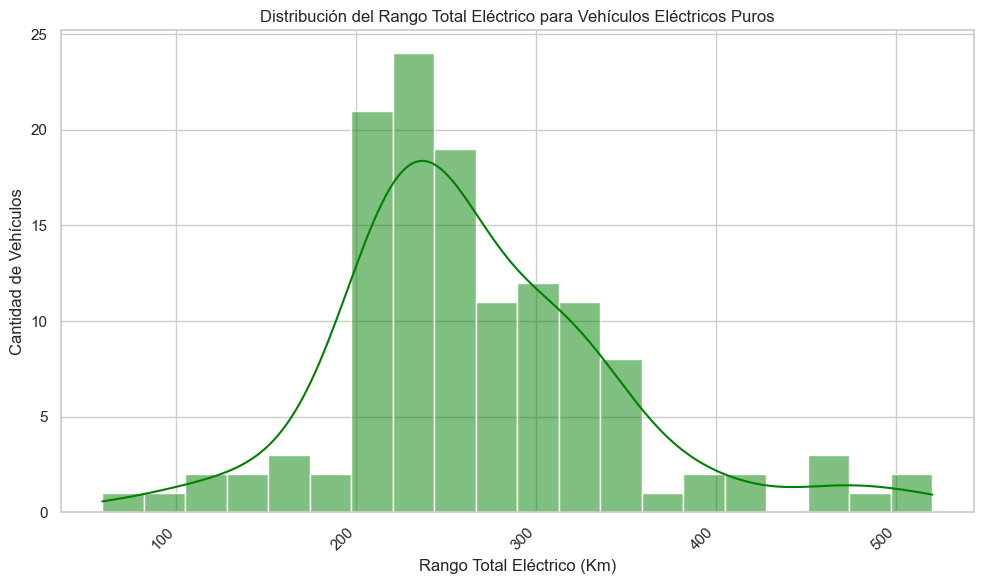

In [21]:
# Filtrar solo vehículos eléctricos puros
electric_vehicles = alternative_fuel_vehicles[alternative_fuel_vehicles['Fuel'] == 'Electric']

# Establecer el estilo y tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crear el histograma con el rango total eléctrico para vehículos eléctricos puros
sns.histplot(x='All-Electric Range', data=electric_vehicles, bins=20, kde=True, color='green')

# Agregar título y etiquetas
plt.title("Distribución del Rango Total Eléctrico para Vehículos Eléctricos Puros")
plt.xlabel("Rango Total Eléctrico (Km)")
plt.ylabel("Cantidad de Vehículos")

plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En el rango del 'All-Electric Range' para vehículos eléctricos puros revela una amplia gama de distancias que estos vehículos pueden recorrer con una carga completa. La diversidad es evidente en los valores que oscilan desde distancias más cortas, como 59 km, hasta distancias más extensas, como 520 km. Este abanico refleja la variedad de capacidades de batería y tecnologías presentes en los vehículos eléctricos puros, subrayando la innovación continua en el desarrollo de baterías para vehículos eléctricos.

Entre los datos, destacan valores más comunes como 270 km, 303 km y 215 km, sugiriendo ciertos estándares o tecnologías predominantes en la fabricación de baterías para estos vehículos. A pesar de la diversidad, se observa que hay un rango promedio entre 200 km y 300 km, que parece ser el más común y probablemente satisfaga las necesidades diarias de conducción para muchos usuarios.